In [1]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Read csv & test path
df = pd.read_csv('/content/loan approval.csv')
df

,Gender,Married,Dependents,Education,Self_Employed,Income(dollar),Coapplicant,Loan_Amount,Term(month),loan_History,Area,Status
0,Male,No,0,Not Graduate,No,144200.0,No,3500000,360.0,1.0,Urban,N
1,Female,No,3+,Not Graduate,No,183000.0,No,0,360.0,0.0,Urban,N
2,Male,Yes,1,Graduate,No,188000.0,No,6100000,360.0,NaN,Rural,N
3,Male,Yes,0,Graduate,No,195000.0,Yes,13500000,360.0,1.0,Rural,N
4,Female,No,0,Not Graduate,No,196300.0,No,5300000,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,3+,Graduate,NaN,4208300.0,Yes,35000000,180.0,NaN,Urban,N
610,Male,Yes,0,Graduate,Yes,4389700.0,Yes,12000000,360.0,1.0,Semiurban,Y
611,NaN,Yes,3+,Graduate,No,5176300.0,No,70000000,300.0,1.0,Urban,Y
612,Male,Yes,0,Graduate,NaN,6333700.0,No,49000000,180.0,1.0,Urban,Y


In [4]:
# Drop Nan & Null & Dupe
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

null_rows   = df.isnull().any()
nan_rows   = df.isna().any()

# null_rows
# nan_rows

In [5]:
df = df[df['Married'] != '-']
dash_rows = df.isin(['-']).any()

# dash_rows

#SVM

In [6]:
df.describe()

,Income(dollar),Loan_Amount,Term(month),loan_History
count,4.930000e+02,4.930000e+02,493.000000,493.000000
mean,6.944886e+05,1.399777e+07,341.549696,0.849899
std,5.930120e+05,8.379632e+06,64.930482,0.357534
min,1.442000e+05,0.000000e+00,36.000000,0.000000
25%,4.166000e+05,9.900000e+06,360.000000,1.000000
50%,5.450000e+05,1.260000e+07,360.000000,1.000000
75%,7.583000e+05,1.680000e+07,360.000000,1.000000
max,8.100000e+06,6.000000e+07,480.000000,1.000000


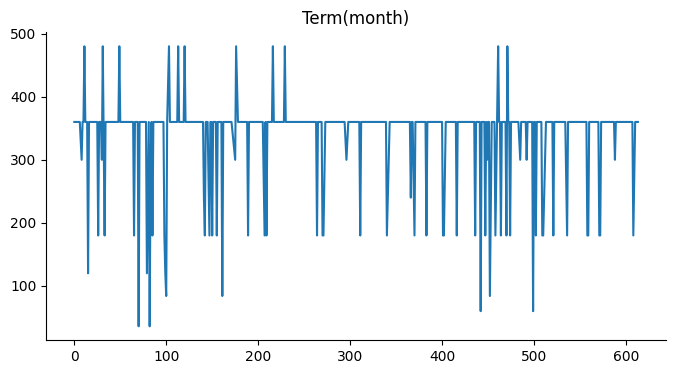

In [7]:
from matplotlib import pyplot as plt
df['Term(month)'].plot(kind='line', figsize=(8, 4), title='Term(month)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
#Map as Number
df['Coapplicant'] = df['Coapplicant'].map({'Yes' : 1, 'No' : 0})
df['Income(dollar)']  = df['Income(dollar)'] / 1000000
df['Loan_Amount'] = df['Loan_Amount'] / 1000000

# Keep only Records Index
y = df['Coapplicant']

X = df[['Income(dollar)', 'Loan_Amount']]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, random_state=101)

X_train

<ipython-input-8-8d2d6525602a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Coapplicant'] = df['Coapplicant'].map({'Yes' : 1, 'No' : 0})
<ipython-input-8-8d2d6525602a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income(dollar)']  = df['Income(dollar)'] / 1000000
<ipython-input-8-8d2d6525602a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Income(dollar),Loan_Amount
55,0.3159,10.0
43,0.2974,5.0
176,0.4328,11.3
118,0.3775,11.0
134,0.3900,7.0
...,...,...
78,0.3453,6.6
412,0.6556,16.2
428,0.6784,11.0
13,0.2378,4.6


In [9]:
X_train.shape

(394, 2)

In [10]:
# Make a Linear SVM Coeff
linear = svm.SVC(kernel='linear', C=0.1)
linear.fit(X_train, y_train)
# Make a Poly SVM Coeff
poly = svm.SVC(kernel='poly', degree=3, C=1)
poly.fit(X_train, y_train)
# Make a Sigmoid SVM Coeff
sigmoid = svm.SVC(kernel='sigmoid', degree=3, C=1)
sigmoid.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid')

# Accuracy Evaluation

In [11]:
# linear
print("Train set accuracy = " + str(linear.score(X_train, y_train)))
print("Test set accuracy = " + str(linear.score(X_test, y_test)))

Train set accuracy = 0.5380710659898477
Test set accuracy = 0.6262626262626263


In [12]:
# poly
print("Train set accuracy = " + str(poly.score(X_train, y_train)))
print("Test set accuracy = " + str(poly.score(X_test, y_test)))

Train set accuracy = 0.5431472081218274
Test set accuracy = 0.6262626262626263


In [13]:
# sigmoid
print("Train set accuracy = " + str(sigmoid.score(X_train, y_train)))
print("Test set accuracy = " + str(sigmoid.score(X_test, y_test)))

Train set accuracy = 0.47715736040609136
Test set accuracy = 0.4444444444444444


#PREDICT

In [14]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
sigmoid_pred = sigmoid.predict(X_test)

#COMPARISON (predict - true)

In [15]:
cmpr_linear_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': linear_pred})
cmpr_poly_df   = pd.DataFrame({'True Values': y_test, 'Predicted Values': poly_pred})
cmpr_sigmoid_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': sigmoid_pred})

In [16]:
print(cmpr_linear_df)

     True Values  Predicted Values
326            1                 1
23             0                 1
559            1                 1
248            1                 1
160            1                 1
..           ...               ...
67             0                 1
316            1                 1
69             1                 1
390            1                 1
461            1                 1

[99 rows x 2 columns]


In [17]:
print(cmpr_poly_df)

     True Values  Predicted Values
326            1                 1
23             0                 1
559            1                 1
248            1                 1
160            1                 1
..           ...               ...
67             0                 1
316            1                 1
69             1                 1
390            1                 1
461            1                 1

[99 rows x 2 columns]


In [18]:
print(cmpr_sigmoid_df)

     True Values  Predicted Values
326            1                 1
23             0                 1
559            1                 0
248            1                 0
160            1                 0
..           ...               ...
67             0                 1
316            1                 0
69             1                 0
390            1                 0
461            1                 0

[99 rows x 2 columns]


In [19]:
# linear model:
linear_correct_count = cmpr_linear_df[cmpr_linear_df['True Values'] == cmpr_linear_df['Predicted Values']].shape[0]
print("Linear Model - Correct Predictions:", linear_correct_count)

# polynomial model:
poly_correct_count = cmpr_poly_df[cmpr_poly_df['True Values'] == cmpr_poly_df['Predicted Values']].shape[0]
print("Polynomial Model - Correct Predictions:", poly_correct_count)

# sigmoid model:
sigmoid_correct_count = cmpr_sigmoid_df[cmpr_sigmoid_df['True Values'] == cmpr_sigmoid_df['Predicted Values']].shape[0]
print("Sigmoid Model - Correct Predictions:", sigmoid_correct_count)

Linear Model - Correct Predictions: 62
Polynomial Model - Correct Predictions: 62
Sigmoid Model - Correct Predictions: 44


#EVALUATION Matrix

(a, b) => (test data, prepared data)

confusion_matrix()
precision_score()
recall_score()
f1_score()

[TP FP FN TN]

In [26]:
conf_matrix_linearSVM = confusion_matrix(y_test, linear_pred)
precision_linearSVM = precision_score(y_test, linear_pred, average="macro")
recall_linearSVM = recall_score(y_test, linear_pred, average="macro")
f1_linearSVM = f1_score(y_test, linear_pred, average="macro")

print("Sigmoid SVM efficiency \n")
print("Precision: ", precision_linearSVM)
print("Recall: ", recall_linearSVM)
print("F1-Score: ", f1_linearSVM)

print("Confusion Matrix:\n", conf_matrix_linearSVM)

Sigmoid SVM efficiency 

Precision:  0.31313131313131315
Recall:  0.5
F1-Score:  0.38509316770186336
Confusion Matrix:
 [[ 0 37]
 [ 0 62]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
conf_matrix_polySVM = confusion_matrix(y_test, poly_pred)
precision_polySVM = precision_score(y_test, poly_pred, average="macro")
recall_polySVM = recall_score(y_test, poly_pred, average="macro")
f1_polySVM = f1_score(y_test, poly_pred, average="macro")

print("Sigmoid SVM efficiency \n")
print("Precision: ", precision_polySVM)
print("Recall: ", recall_polySVM)
print("F1-Score: ", f1_polySVM)

print("Confusion Matrix:\n", conf_matrix_polySVM)

Sigmoid SVM efficiency 

Precision:  0.31313131313131315
Recall:  0.5
F1-Score:  0.38509316770186336
Confusion Matrix:
 [[ 0 37]
 [ 0 62]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
conf_matrix_sigmoidSVM = confusion_matrix(y_test, sigmoid_pred)
precision_sigmoidSVM = precision_score(y_test, sigmoid_pred, average="macro")
recall_sigmoidSVM = recall_score(y_test, sigmoid_pred, average="macro")
f1_sigmoidSVM = f1_score(y_test, sigmoid_pred, average="macro")

print("Sigmoid SVM efficiency \n")
print("Precision: ", precision_sigmoidSVM)
print("Recall: ", recall_sigmoidSVM)
print("F1-Score: ", f1_sigmoidSVM)

print("Confusion Matrix:\n", conf_matrix_sigmoidSVM)

Sigmoid SVM efficiency 

Precision:  0.44571428571428573
Recall:  0.4420226678291195
F1-Score:  0.4361602982292637
Confusion Matrix:
 [[16 21]
 [34 28]]


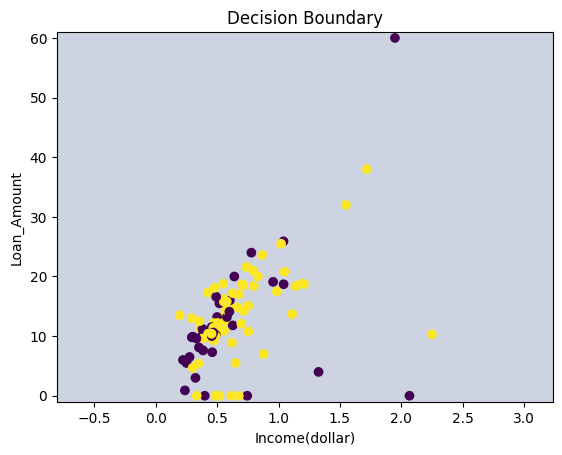

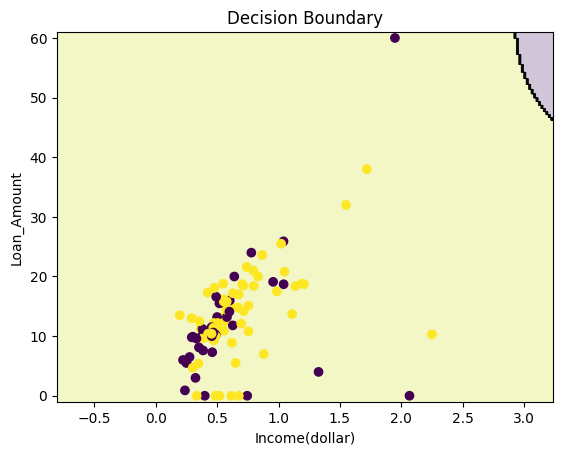

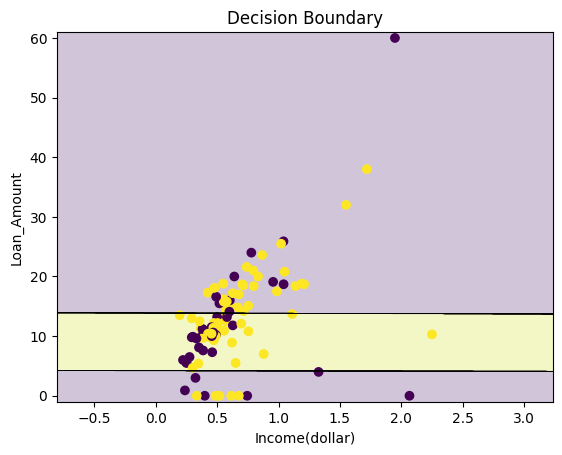

In [44]:
def plot_decision_boundary(model, X, y, cmap='viridis'):
    # X['Income(dollar)', 'Loan_Amount']
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Slice idx 0
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Slice idx 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), # Make a mesh in range ( numpy )
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Income(dollar)', 'Loan_Amount'])) # Take model on meshed to predict range z
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)  # Filled contours for regions
    plt.contour(xx, yy, Z, colors='k', linewidths=0.5)  # Decision boundary line

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.xlabel('Income(dollar)')
    plt.ylabel('Loan_Amount')
    plt.title('Decision Boundary')
    plt.show()

# linear model:
plot_decision_boundary(linear, np.array(X_test), np.array(y_test))

# polynomial model:
plot_decision_boundary(poly, np.array(X_test), np.array(y_test))

# sigmoid model:
plot_decision_boundary(sigmoid, np.array(X_test), np.array(y_test))

In [45]:
import joblib

filename = 'finalized_model.sav'
joblib.dump(linear, filename)

['finalized_model.sav']

In [48]:
j = joblib.load('/content/finalized_model.sav')
j

SVC(C=0.1, kernel='linear')